# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import math
%matplotlib inline
from random import randint

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here
def dice_roll(n=10):
    return pd.DataFrame([randint(1,6) for i in range(n)],columns=['value'])

rolls = dice_roll()
# rolls

#### 2.- Plot the results sorted by value.

In [4]:
# your code here
rolls.sort_values('value')

,value
1,1
3,1
4,2
7,2
0,3
5,3
2,4
8,4
6,5
9,6


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

1    2
2    2
3    2
4    2
5    1
6    1
Name: value, dtype: int64


array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

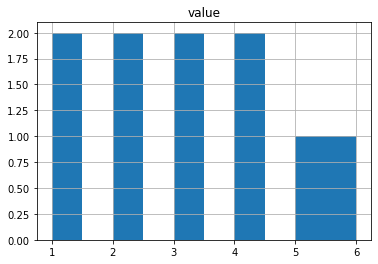

In [5]:
# your code here
def own_freq_dis(l):
    return l['value'].value_counts(sort=False)
print(own_freq_dis(rolls))
rolls.hist()

In [6]:
"""
I think viewing the data graphically makes it easier to understand the data distribution.
"""

'\nI think viewing the data graphically makes it easier to understand the data distribution.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def own_mean(l):
    return sum(l.values)/len(l)

print(own_mean(rolls))

[3.1]


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
freq = own_freq_dis(rolls)
print(freq)

1    2
2    2
3    2
4    2
5    1
6    1
Name: value, dtype: int64


In [9]:
def own_mean_freq(l):
    freq=[[i,list(l['value'].values).count(i)] for i in set(l['value'].values)]
    m_freq=[(i[0]*i[1]) for i in freq]
    return sum(m_freq)/len(l['value'])

own_mean_freq(rolls)

3.1

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
def own_median(l):
    sorted_list = sorted(l.values)
    list_len = len(l)
    index = (list_len - 1) // 2
    if (list_len % 2):
        result = sorted_list[index]
    else:
        result = (sorted_list[index] + sorted_list[index + 1])/2
    return result[0]
print(own_median(rolls))


3.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code her
def own_quartiles(l):
    percentiles = [25,50,75,100]
    sorted_list = sorted(l.values)
    for p in percentiles:        
        k = (len(sorted_list)-1) * p/100
        f = math.floor(k)
        c = math.ceil(k)
        if f == c:
            print((p, sorted_list[int(k)][0]))
        else:
            print((p,((sorted_list[(f)]) + (sorted_list[(c)]))[0]/2))

own_quartiles(rolls)

(25, 2.0)
(50, 3.0)
(75, 4.0)
(100, 6)


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<AxesSubplot:>

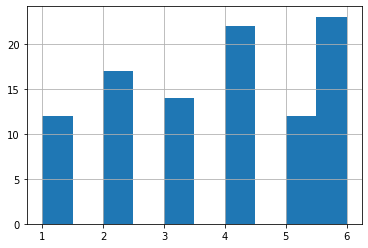

In [12]:
# your code here
roll_data = pd.read_csv('../data/roll_the_dice_hundred.csv').sort_values('value')[['roll','value']]
roll_data
roll_data['value'].hist()

In [13]:
"""
The data distribution is similar to the previous one but,
the differences between the number of times each value was rolled is not that big.
"""

'\nThe data distribution is similar to the previous one but,\nthe differences between the number of times each value was rolled is not that big.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [14]:
# your code here
mean = own_mean(roll_data['value'])
print(mean)

3.74


#### 3.- Now, calculate the frequency distribution.


In [15]:
# your code here
freq = own_freq_dis(roll_data)
print(freq)

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

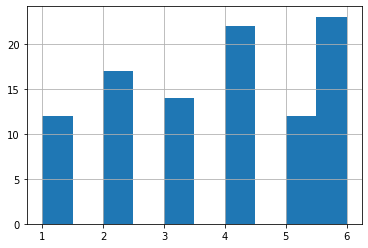

In [16]:
# your code here
roll_data['value'].hist()

In [17]:
"""
The shape resembles the shape of the 10 rolls which is somewhat a Symmetrical shape. 
The mean value will be closer to 4
"""

'\nThe shape resembles the shape of the 10 rolls which is somewhat a Symmetrical shape. \nThe mean value will be closer to 4\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:>

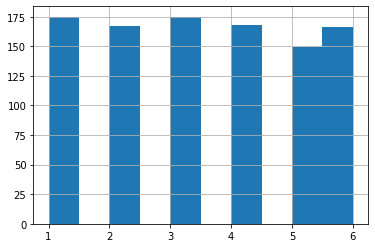

In [18]:
# your code here
roll_data_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv').sort_values('value')[['roll','value']]
thousand_frequency = own_freq_dis(roll_data_thousand)
roll_data_thousand['value'].hist()

In [19]:
"""
The data distribution is more or less the same, but with less diference between occurences.
the shape is getting more and more symetrical with the increase of rolls.
"""

'\nThe data distribution is more or less the same, but with less diference between occurences.\nthe shape is getting more and more symetrical with the increase of rolls.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

Mean guess - Between 33 abd 41
Standard Deviation guess - Around 10


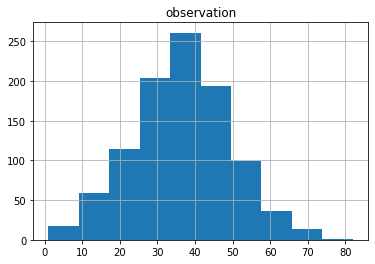

In [20]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
ages.hist()
print("Mean guess - Between 33 abd 41")
print("Standard Deviation guess - Around 10")


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [21]:
# your code here
ages_mean = ages.mean()
ages_std = ages.std()

In [22]:
"""
The mean yes, the standard deviation not so much. But it is a close value. 
Graphical visualization helps a lot in the initial analysis
"""

'\nThe mean yes, the standard deviation not so much. But it is a close value. \nGraphical visualization helps a lot in the initial analysis\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

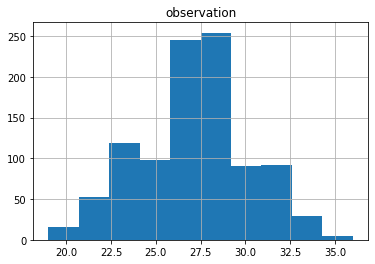

In [23]:
# your code here
ages2 = pd.read_csv("../data/ages_population2.csv")
ages2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [24]:
"""
Yes. The range is quite shorter. But the type of distribution seems to be more or less the same, unimodal.
"""

'\nYes. The range is quite shorter. But the type of distribution seems to be more or less the same, unimodal.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [25]:
# your code here
ages2_mean = ages2.mean()
print(ages2_mean)
ages2_std = ages2.std()
print(ages2_std)

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [26]:
"""
Both values are much smaller. Especially the standard deviation.
It seems that this study (ages2 dataset) is much more specific than the first one (ages dataset).
Also because the range of data is quite less.
"""

'\nBoth values are much smaller. Especially the standard deviation.\nIt seems that this study (ages2 dataset) is much more specific than the first one (ages dataset).\nAlso because the range of data is quite less.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

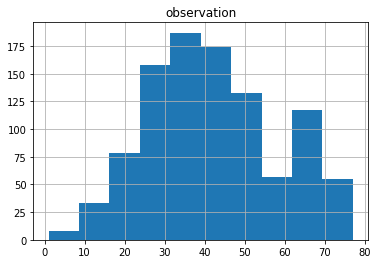

In [27]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [28]:
# your code here
ages3_mean = ages3.mean()
print(ages3_mean)
ages3_std = ages3.std()
print(ages3_std)

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [29]:
"""
your comments here
Both Average and standard deviation increased making the histogram a bit more skewed to the right. 
Altough the range is the same as is the first dataset. This neighborhood has more older people.
"""

'\nyour comments here\nBoth Average and standard deviation increased making the histogram a bit more skewed to the right. \nAltough the range is the same as is the first dataset. This neighborhood has more older people.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [30]:
# your code here
print(ages3['observation'].quantile([0.25,0.50,0.75,1]))
print("Difference:", ages3.mean()-ages3.median())


0.25    30.0
0.50    40.0
0.75    53.0
1.00    77.0
Name: observation, dtype: float64
Difference: observation    1.989
dtype: float64


In [31]:
"""
Compared to other neighbourhoods this one has indeed "older" people than other neighbourhoods. 
50% of the populations is more that 40years old.
"""

'\nCompared to other neighbourhoods this one has indeed "older" people than other neighbourhoods. \n50% of the populations is more that 40years old.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [32]:
# your code here
print(ages3['observation'].quantile([0.1,0.5,0.9]))

0.1    22.0
0.5    40.0
0.9    67.0
Name: observation, dtype: float64


In [33]:
"""
I think this percentiles will help the analysis. 
A lot of "outliers" are removed with these intervals
"""

'\nI think this percentiles will help the analysis. \nA lot of "outliers" are removed with these intervals\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [34]:
# your code here
ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [35]:
ages2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [36]:
ages3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [37]:
"""
From the 3 neighbourhoods we can easilly state that:
Neighbourhood 1 is probably a young family neighbourhood. We have a minimun age of 1, and 50% of the population is under the 40years old.
Neighbourhood 2 is probably a student neighbourhood, since the minimum age is 19 Years old and Max 36, which means that the Neighbourhood is quite young
Neighbourhood 3 is also a family neighbouhood, but with a few more older people with a increase in the 60-70 years old population.
""" 

'\nFrom the 3 neighbourhoods we can easilly state that:\nNeighbourhood 1 is probably a young family neighbourhood. We have a minimun age of 1, and 50% of the population is under the 40years old.\nNeighbourhood 2 is probably a student neighbourhood, since the minimum age is 19 Years old and Max 36, which means that the Neighbourhood is quite young\nNeighbourhood 3 is also a family neighbouhood, but with a few more older people with a increase in the 60-70 years old population.\n'